## Nafiz Emir Eğilli - FERM 515 – Fixed Income in Emerging Markets - Homework 1

#### 1. (30 pts) Consider the Vasicek model of interest rate
### $$ 𝑑𝑟 = 𝛼(𝑟̅− 𝑟)𝑑𝑡 + 𝜎𝑑𝑧 $$
#### Let 𝑟̅= 12% and r0 be the short-term interest rate today (Take r0 as 14%). Choose a small “dt” (e.g. dt = 1/252 = 1 day) and simulate the process over a 5-year period for various choices of 𝛼 and $\sigma$. (dz ∼ N(0, dt)) Plot and explain your results. How does the process depend on these two parameters? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Vasicek model parameters
r_bar = 0.12
r0 = 0.14
T = 5  # years
dt = 1/252  # time step in years
num_steps = int(T / dt)

In [3]:
# Function to simulate Vasicek model
def vasicek_simulation(r0, r_bar, alpha, sigma, dt, num_steps):
    rates = np.zeros(num_steps)
    rates[0] = r0
    for t in range(1, num_steps):
        dr = alpha * (r_bar - rates[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[t] = rates[t-1] + dr
    return rates

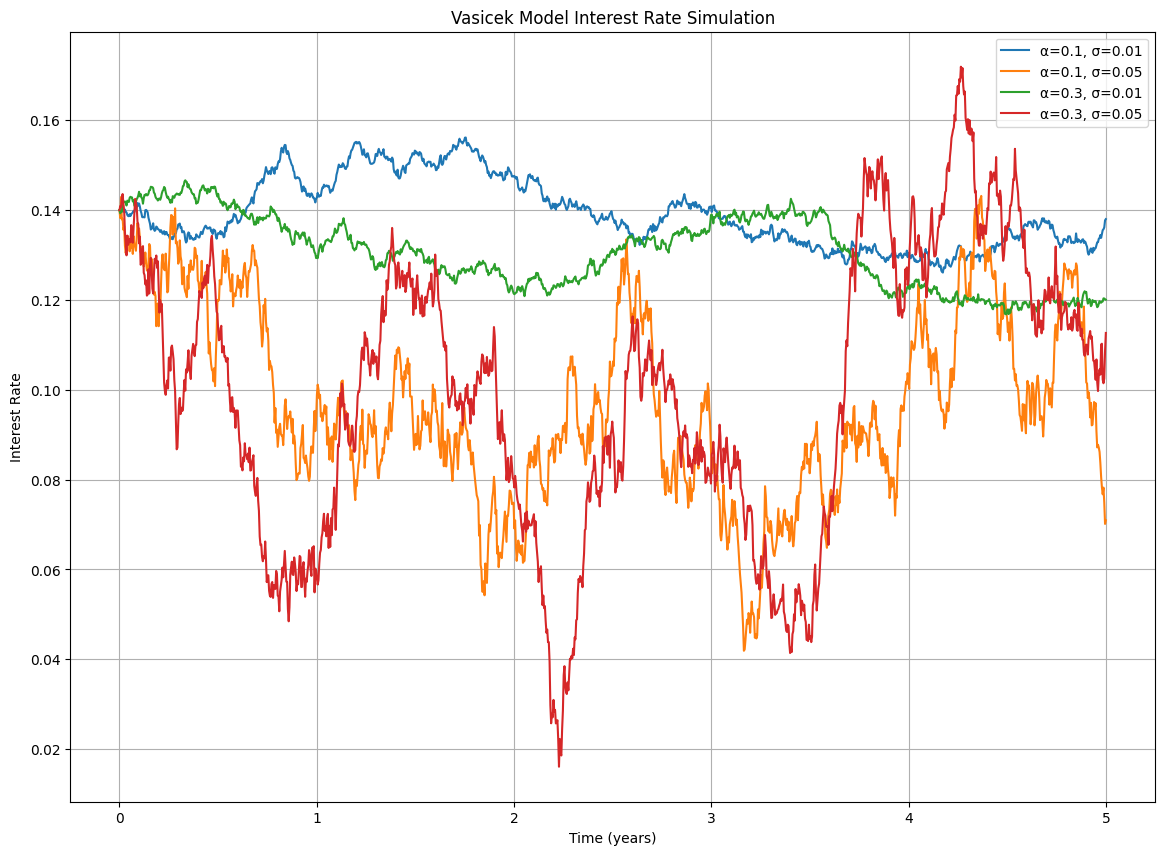

In [4]:
# Define different parameter sets
parameter_sets = [
    {"alpha": 0.1, "sigma": 0.01},
    {"alpha": 0.1, "sigma": 0.05},
    {"alpha": 0.3, "sigma": 0.01},
    {"alpha": 0.3, "sigma": 0.05},
]

# Simulate and plot the interest rate paths for each parameter set
plt.figure(figsize=(14, 10))
time_grid = np.linspace(0, T, num_steps)
for params in parameter_sets:
    rates = vasicek_simulation(r0, r_bar, params["alpha"], params["sigma"], dt, num_steps)
    plt.plot(time_grid, rates, label=f'α={params["alpha"]}, σ={params["sigma"]}')

plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.title('Vasicek Model Interest Rate Simulation')
plt.legend()
plt.grid(True)
plt.show()

#### 2. (30 pts) Use the closed form solution for the Vasicek model that we discussed in class to compute the spot rate term structure from 1 year to 10 year with the parameters 𝑟̅= 8%. 
#### $\alpha$ = 0.35. $\sigma$ = 0.02. and $r_0$ = 4%.
#### a) Plot and comment on the shape of the term structure.
#### b) Assume that below spot rates are the ones corresponding to the bonds currently trading. Which bonds are expensive/cheap relative to the Vasicek term structure?
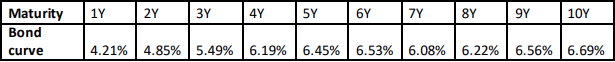

-----------------------------------------------------------------------
The price of a zero-coupon bond under the Vasicek model is given by:
$P(t, T) = A(t, T) \cdot \exp(-B(t, T) \cdot r(t)) $
where:

$ B(t, T) = \frac{1 - e^{-\alpha (T-t)}}{\alpha} $

$A(t, T) = \exp \left( \left( \frac{B(t, T) - (T-t)}{B(t, T)} \right) \left( \frac{\sigma^2}{2 \alpha^2} \right) - \left( \frac{\sigma^2 B(t, T)^2}{4 \alpha} \right) \right) $

The spot rate $r(T)$ can be derived from the zero-coupon bond price as:
$ r(T) = -\frac{\ln P(0, T)}{T} $

In [5]:
# Vasicek model parameters
r_bar = 0.08
alpha = 0.35
sigma = 0.02
r0 = 0.04
maturities = np.arange(1, 11)  # 1 to 10 years

In [6]:
# Functions to calculate A(t, T) and B(t, T)
def B(t, T, alpha):
    return (1 - np.exp(-alpha * (T - t))) / alpha

def A(t, T, alpha, sigma, r_bar):
    B_term = B(t, T, alpha)
    return np.exp((B_term - (T - t)) * (r_bar - (sigma**2 / (2 * alpha**2))) - (sigma**2 * B_term**2) / (4 * alpha))

# Calculate zero-coupon bond prices P(0, T)
def zero_coupon_bond_price(t, T, alpha, sigma, r_bar, r0):
    A_t_T = A(t, T, alpha, sigma, r_bar)
    B_t_T = B(t, T, alpha)
    return A_t_T * np.exp(-B_t_T * r0)

# Calculate spot rates from zero-coupon bond prices
spot_rates = []
for T in maturities:
    P_0_T = zero_coupon_bond_price(0, T, alpha, sigma, r_bar, r0)
    spot_rate = -np.log(P_0_T) / T
    spot_rates.append(spot_rate * 100)  # Convert to percentage

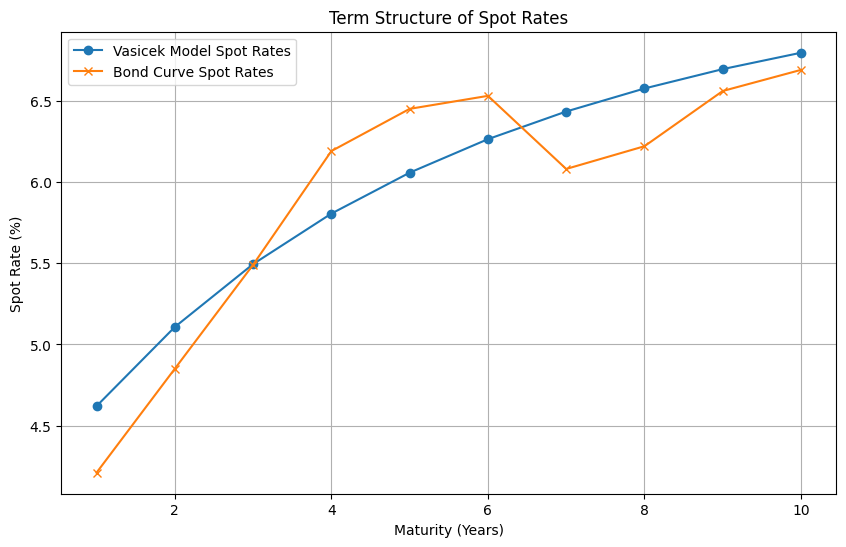

In [7]:
# Plot the term structure of spot rates
plt.figure(figsize=(10, 6))
plt.plot(maturities, spot_rates, marker='o', label='Vasicek Model Spot Rates')
plt.plot(maturities, [4.21, 4.85, 5.49, 6.19, 6.45, 6.53, 6.08, 6.22, 6.56, 6.69], marker='x', label='Bond Curve Spot Rates')
plt.xlabel('Maturity (Years)')
plt.ylabel('Spot Rate (%)')
plt.title('Term Structure of Spot Rates')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Compare Vasicek model spot rates with bond curve spot rates
bond_curve_spot_rates = np.array([4.21, 4.85, 5.49, 6.19, 6.45, 6.53, 6.08, 6.22, 6.56, 6.69])
vasicek_spot_rates = np.array(spot_rates)
differences = vasicek_spot_rates - bond_curve_spot_rates

# Determine which bonds are expensive or cheap
expensive_bonds = np.where(differences > 0, "Expensive", "Cheap")

# Create a DataFrame for readability
df = pd.DataFrame({
    "Maturity (Years)": maturities,
    "Vasicek Spot Rates (%)": vasicek_spot_rates,
    "Bond Curve Spot Rates (%)": bond_curve_spot_rates,
    "Differences (%)": differences,
    "Classification": expensive_bonds
})

# Display the DataFrame
df

,Maturity (Years),Vasicek Spot Rates (%),Bond Curve Spot Rates (%),Differences (%),Classification
0,1,4.619837,4.21,0.409837,Expensive
1,2,5.107048,4.85,0.257048,Expensive
2,3,5.494239,5.49,0.004239,Expensive
3,4,5.805112,6.19,-0.384888,Cheap
4,5,6.057144,6.45,-0.392856,Cheap
5,6,6.263383,6.53,-0.266617,Cheap
6,7,6.433675,6.08,0.353675,Expensive
7,8,6.575515,6.22,0.355515,Expensive
8,9,6.694660,6.56,0.134660,Expensive
9,10,6.795564,6.69,0.105564,Expensive


#### 3. (40 pts) Consider following three bonds whose features are summarized in the following table:
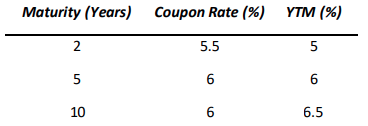
#### The face value of bonds is $100, YTM stands for yield to maturity, coupons are received annually. We structure a butterfly strategy (combination of bullet and barbell) in the following way:
- We sell 10000 5-year maturity bonds;
- We buy 5000 2-year maturity bonds and 5000 10-year maturity bonds.
#### a) Suppose that, one month later the YTM curve has changed. A flattening movement has happened so that the curve rotates around the body. We consider the following movement “+50/0/−50” meaning that the short wing YTM increases by 50 bps, the body does not move and the long wing YTM decreases by 50 bps. Compute the total return of the butterfly.
#### b) Same question with a steepening movement “−50/0/+50”.

-----------------------------------------------------------------------
We will use the bond pricing formula:
### $ P = \sum_{t=1}^{n} \frac{C}{(1+y)^t} + \frac{F}{(1+y)^n} $
where:

- P is the price of the bond,
- C is the annual coupon payment,
- y is the yield to maturity (YTM),
- F is the face value of the bond,
- n is the total number of periods (years in this case).

In [9]:
# Bond details
face_value = 100
bonds = {
    "2-year": {"maturity": 2, "coupon_rate": 5.5, "ytm": 5},
    "5-year": {"maturity": 5, "coupon_rate": 6, "ytm": 6},
    "10-year": {"maturity": 10, "coupon_rate": 6, "ytm": 6.5}
}

# Positions
positions = {
    "2-year": 5000,
    "5-year": -10000,
    "10-year": 5000
}

In [10]:
# Bond pricing function
def bond_price(face_value, maturity, coupon_rate, ytm):
    coupon_payment = face_value * coupon_rate / 100
    periods = np.arange(1, maturity + 1)
    price = np.sum(coupon_payment / (1 + ytm / 100) ** periods) + face_value / (1 + ytm / 100) ** maturity
    return price

# Initial prices
initial_prices = {bond: bond_price(face_value, details["maturity"], details["coupon_rate"], details["ytm"]) for bond, details in bonds.items()}

# Function to calculate new bond prices after yield change
def new_prices(bonds, yield_changes):
    return {bond: bond_price(face_value, details["maturity"], details["coupon_rate"], details["ytm"] + yield_changes[bond]) for bond, details in bonds.items()}

In [11]:
# A-) Flattening movement: +50 bps for 2-year, 0 bps for 5-year, -50 bps for 10-year
yield_changes_flattening = {
    "2-year": 0.5,
    "5-year": 0,
    "10-year": -0.5
}
flattening_prices = new_prices(bonds, yield_changes_flattening)

# B-) Steepening movement: -50 bps for 2-year, 0 bps for 5-year, +50 bps for 10-year
yield_changes_steepening = {
    "2-year": -0.5,
    "5-year": 0,
    "10-year": 0.5
}
steepening_prices = new_prices(bonds, yield_changes_steepening)


In [12]:
# Calculate returns
def calculate_return(initial_prices, new_prices, positions):
    total_initial_value = sum(positions[bond] * initial_prices[bond] for bond in positions)
    total_new_value = sum(positions[bond] * new_prices[bond] for bond in positions)
    return total_new_value - total_initial_value

return_flattening = calculate_return(initial_prices, flattening_prices, positions)
return_steepening = calculate_return(initial_prices, steepening_prices, positions)

# Intermediate results for verification
print("Initial Values:", {bond: positions[bond] * initial_prices[bond] for bond in positions})
print("Flattening New Values:", {bond: positions[bond] * flattening_prices[bond] for bond in positions})
print("Steepening New Values:", {bond: positions[bond] * steepening_prices[bond] for bond in positions}, "\n")


# Results
print("Initial Prices:", initial_prices)
print("Flattening Prices:", flattening_prices)
print("Steepening Prices:", steepening_prices)
print("Return for Flattening Movement:", return_flattening)
print("Return for Steepening Movement:", return_steepening)

Initial Values: {'2-year': 504648.5260770975, '5-year': -999999.9999999999, '10-year': 482027.92444309744}
Flattening New Values: {'2-year': 500000.0, '5-year': -999999.9999999999, '10-year': 499999.9999999999}
Steepening New Values: {'2-year': 509363.3387514023, '5-year': -999999.9999999999, '10-year': 464882.0922953368} 

Initial Prices: {'2-year': 100.9297052154195, '5-year': 99.99999999999999, '10-year': 96.40558488861949}
Flattening Prices: {'2-year': 100.0, '5-year': 99.99999999999999, '10-year': 99.99999999999997}
Steepening Prices: {'2-year': 101.87266775028046, '5-year': 99.99999999999999, '10-year': 92.97641845906736}
Return for Flattening Movement: 13323.549479804933
Return for Steepening Movement: -12431.019473455846
